<a href="https://colab.research.google.com/github/seijimorimoto/CE888-Data-Science/blob/master/Lab7/Exercise_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 7. Deep Learning**

## **Exercise 4. CNN with dataset different from Dogs vs Cats**

In [17]:
!pip install tensorflow==1.3.0
!pip install keras==2.0.7

     |████████████████████████████████| 43.6MB 69kB/s 
     |████████████████████████████████| 1.6MB 46.4MB/s 
     |████████████████████████████████| 890kB 52.6MB/s 
  Created wheel for html5lib: filename=html5lib-0.9999999-cp36-none-any.whl size=107220 sha256=ce84bdc932fb8c26a69321952b4191829b79c60814620503583fa02b64defc88
  Stored in directory: /root/.cache/pip/wheels/50/ae/f9/d2b189788efcf61d1ee0e36045476735c838898eef1cad6e29
Successfully built html5lib
  Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Found existing installation: bleach 3.1.4
    Uninstalling bleach-3.1.4:
      Successfully uninstalled bleach-3.1.4
  Found existing installation: tensorflow 2.2.0rc2
    Uninstalling tensorflow-2.2.0rc2:
      Successfully uninstalled tensorflow-2.2.0rc2


     |████████████████████████████████| 276kB 8.3MB/s 
ERROR: textgenrnn 1.4.1 has requirement keras>=2.1.5, but you'll have keras 2.0.7 which is incompatible.
  Found existing installation: Keras 2.2.5
    Uninstalling Keras-2.2.5:
      Successfully uninstalled Keras-2.2.5


In [0]:
import os
os.environ['KAGGLE_USERNAME'] = "angelseiji" # username from the json file
os.environ['KAGGLE_KEY'] = "3e470ed59c5813172fc10654ef9af1ea" # key from the json file 

In [2]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:39<00:00, 46.6MB/s]
100% 2.29G/2.29G [00:39<00:00, 62.5MB/s]


In [3]:
from zipfile import ZipFile

file_name = "/content/chest-xray-pneumonia.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [0]:
data_dir_list = os.listdir('/content/train')
#print(data_dir_list)

path, dirs, files = next(os.walk("/content/train"))
file_count = len(files)
print(file_count)

In [16]:
print("Train-normal:", len(os.listdir('/content/chest_xray/train/NORMAL')))
print("Train-pneumonia:", len(os.listdir('/content/chest_xray/train/PNEUMONIA')))
print("Validation-normal:", len(os.listdir('/content/chest_xray/val/NORMAL')))
print("Validation-pneumonia:", len(os.listdir('/content/chest_xray/val/PNEUMONIA')))
print("Test-normal:", len(os.listdir('/content/chest_xray/test/NORMAL')))
print("Test-pneumonia:", len(os.listdir('/content/chest_xray/test/PNEUMONIA')))

Train-normal: 1000
Train-pneumonia: 1000
Validation-normal: 8
Validation-pneumonia: 8
Test-normal: 234
Test-pneumonia: 390


In [0]:
def remove_excess_of_files_in_dir(dir, max_files_allowed):
  file_count = 0
  for root, dirs, files in os.walk(dir):
    for name in files:
      if file_count >= max_files_allowed:
        os.remove(os.path.join(root, name))
      file_count = file_count + 1

In [0]:
remove_excess_of_files_in_dir('/content/chest_xray/train/NORMAL', 1000)
remove_excess_of_files_in_dir('/content/chest_xray/train/PNEUMONIA', 1000)

In [1]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:458: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:459: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:460: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:461: FutureWarn

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [0]:
from keras import optimizers
model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [24]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_dir = '/content/chest_xray/train'
validation_dir = '/content/chest_xray/val'
test_dir = '/content/chest_xray/test'

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150), 
                                                    batch_size=20,
                                                    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=16,
                                                        class_mode='binary')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(150, 150),
                                                  batch_size=64,
                                                  class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [19]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=15 ,
                              validation_data=validation_generator,
                              validation_steps=1)

Epoch 1/15
100/100 [==============================] - 222s - loss: 0.2397 - acc: 0.9020 - val_loss: 0.3578 - val_acc: 0.8750
Epoch 2/15
100/100 [==============================] - 215s - loss: 0.1909 - acc: 0.9195 - val_loss: 0.3231 - val_acc: 0.8750
Epoch 3/15
100/100 [==============================] - 214s - loss: 0.1516 - acc: 0.9430 - val_loss: 0.3390 - val_acc: 0.8750
Epoch 4/15
100/100 [==============================] - 215s - loss: 0.1389 - acc: 0.9450 - val_loss: 0.4171 - val_acc: 0.7500
Epoch 5/15
100/100 [==============================] - 216s - loss: 0.1152 - acc: 0.9580 - val_loss: 0.3862 - val_acc: 0.8125
Epoch 6/15
100/100 [==============================] - 214s - loss: 0.1150 - acc: 0.9565 - val_loss: 0.1888 - val_acc: 0.9375
Epoch 7/15
100/100 [==============================] - 213s - loss: 0.1089 - acc: 0.9650 - val_loss: 0.1731 - val_acc: 0.9375
Epoch 8/15
100/100 [==============================] - 214s - loss: 0.0899 - acc: 0.9625 - val_loss: 0.4842 - val_acc: 0.8125


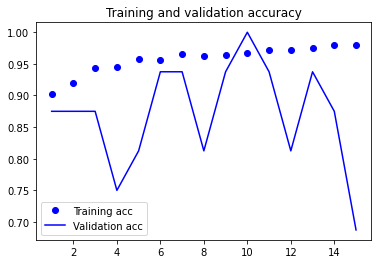

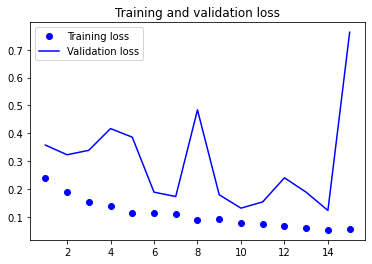

In [20]:
model.save('pneumonia.h5')

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [25]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=10)
print('Test loss:', test_loss)
print('Test acc:', test_acc)

Test loss: 1.5498285171313164
Test acc: 0.7291666651383425
